<a href="https://colab.research.google.com/github/AnhQuocVo/Forcast_Analysis_Securities/blob/main/Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [138]:
#!pip install vnstock pandas numpy

In [169]:
import yfinance as yf
from vnstock import Vnstock

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [140]:
tickers = ['VCI', 'SSI', 'VND', 'TCB', 'MBB']

all_bs = {}
all_is = {}
all_cf = {}
all_ratios = {}
all_prices = {}

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        stock = Vnstock().stock(symbol=ticker, source='TCBS')

        # Fetch financial statements and ratios
        bs = stock.finance.balance_sheet(period='quarter', lang='vi')
        is_ = stock.finance.income_statement(period='quarter', lang='vi')
        cf = stock.finance.cash_flow(period='quarter')
        ratios = stock.finance.ratio(period='quarter', lang='vi')

        # TCBS source does not have a 'price' attribute like VCI
        # prices = stock.price.historical(start='2015-01-01', end='2025-01-01', interval='1D')

        all_bs[ticker] = bs
        all_is[ticker] = is_
        all_cf[ticker] = cf
        all_ratios[ticker] = ratios
        # all_prices[ticker] = prices

    except Exception as e:
        print(f"Could not fetch data for {ticker}: {e}")

print("\nData fetching complete.")


2025-10-12 04:27:52 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-12 04:27:52 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports


Fetching data for VCI...


2025-10-12 04:27:53 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:53 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:53 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-12 04:27:53 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports


Fetching data for SSI...


2025-10-12 04:27:54 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:54 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:55 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-12 04:27:55 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports


Fetching data for VND...


2025-10-12 04:27:55 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:55 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:56 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-12 04:27:56 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports


Fetching data for TCB...


2025-10-12 04:27:56 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:56 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:57 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-12 04:27:57 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports


Fetching data for MBB...


2025-10-12 04:27:57 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports
2025-10-12 04:27:57 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
INFO:vnstock.common.data.data_explorer:TCBS only supports Vietnamese reports



Data fetching complete.


In [141]:
# # vn_symbols_list=[symbol + '.VN' for symbol in symbols_list]
# ticker_vn = [ticker + '.VN' for ticker in tickers]
# prices = yf.download(tickers=ticker_vn, start='2015-01-01', end='2025-01-01', auto_adjust=False).stack()
# prices.index.names = ['date', 'ticker']
# prices.columns = prices.columns.str.lower()
# prices.unique.columns

In [142]:
combined_bs = pd.DataFrame()
for ticker, df in all_bs.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})    # Assuming the 'period' column is the date/period index
    combined_bs = pd.concat([combined_bs, df])
combined_bs = combined_bs.set_index(['ticker', 'date']) # Set 'ticker' and 'date' as the index


# Combine Income Statement DataFrames
combined_is = pd.DataFrame()
for ticker, df in all_is.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_is = pd.concat([combined_is, df])
combined_is = combined_is.set_index(['ticker', 'date'])

# Combine Cash Flow DataFrames
combined_cf = pd.DataFrame()
for ticker, df in all_cf.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_cf = pd.concat([combined_cf, df])
combined_cf = combined_cf.set_index(['ticker', 'date'])

# Combine Ratios DataFrames
combined_ratios = pd.DataFrame()
for ticker, df in all_ratios.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_ratios = pd.concat([combined_ratios, df])
combined_ratios = combined_ratios.set_index(['ticker', 'date'])

print("Unique columns in combined_bs:")
display(combined_bs.head())
print(combined_bs.columns.unique())
print(combined_bs.shape)

print("Unique columns in combined_is:")
display(combined_is.head())
print(combined_is.columns.unique())
print(combined_is.shape)

print("\nUnique columns in combined_cf:")
display(combined_cf.head())
print(combined_cf.columns.unique())
print(combined_cf.shape)

print("\nUnique columns in combined_ratios:")
display(combined_ratios.head())
print(combined_ratios.columns.unique())
print(combined_ratios.shape)



Unique columns in combined_bs:


quarter  year  short_asset  cash  short_invest  \
ticker date                                                     
VCI    2025-Q2       2  2025      21777.0   472       20797.0   
       2025-Q1       1  2025      23621.0  2302       19710.0   
       2024-Q4       4  2024      26492.0  4744       21073.0   
       2024-Q3       3  2024      20322.0  2544       17409.0   
       2024-Q2       2  2024      23010.0  3903       17775.0   

                short_receivable  inventory  long_asset  fixed_asset  asset  \
ticker date                                                                   
VCI    2025-Q2             340.0        0.0       120.0           56  21898   
       2025-Q1            1257.0        0.0       107.0           43  23728   
       2024-Q4             507.0        0.0       100.0           37  26592   
       2024-Q3             236.0        0.0        93.0           29  20415   
       2024-Q2             931.0        0.0        95.0           32  23105   

                ...  net_customer_loan  other_asset  other_bank_credit  \
ticker date     ...                                                      
VCI    2025-Q2  ...                NaN          NaN                NaN   
       2025-Q1  ...                NaN          NaN                NaN   
       2024-Q4  ...                NaN          NaN                NaN   
       2024-Q3  ...                NaN          NaN                NaN   
       2024-Q2  ...                NaN          NaN                NaN   

                owe_other_bank  owe_central_bank  valuable_paper  \
ticker date                                                        
VCI    2025-Q2             NaN               NaN             NaN   
       2025-Q1             NaN               NaN             NaN   
       2024-Q4             NaN               NaN             NaN   
       2024-Q3             NaN               NaN             NaN   
       2024-Q2             NaN               NaN             NaN   

                payable_interest  receivable_interest  deposit  fund  
ticker date                                                           
VCI    2025-Q2               NaN                  NaN      NaN   NaN  
       2025-Q1               NaN                  NaN      NaN   NaN  
       2024-Q4               NaN                  NaN      NaN   NaN  
       2024-Q3               NaN                  NaN      NaN   NaN  
       2024-Q2               NaN                  NaN      NaN   NaN  

[5 rows x 36 columns]

Index(['quarter', 'year', 'short_asset', 'cash', 'short_invest',
       'short_receivable', 'inventory', 'long_asset', 'fixed_asset', 'asset',
       'debt', 'short_debt', 'long_debt', 'equity', 'capital', 'other_debt',
       'un_distributed_income', 'minor_share_holder_profit', 'payable',
       'central_bank_deposit', 'other_bank_deposit', 'other_bank_loan',
       'stock_invest', 'customer_loan', 'bad_loan', 'provision',
       'net_customer_loan', 'other_asset', 'other_bank_credit',
       'owe_other_bank', 'owe_central_bank', 'valuable_paper',
       'payable_interest', 'receivable_interest', 'deposit', 'fund'],
      dtype='object')
(291, 36)
Unique columns in combined_is:


quarter  year  revenue  year_revenue_growth  \
ticker date                                                  
VCI    2025-Q2       2  2025     1160                0.266   
       2025-Q1       1  2025      851                0.055   
       2024-Q4       4  2024      999                0.240   
       2024-Q3       3  2024      974                0.461   
       2024-Q2       2  2024      916                0.829   

                quarter_revenue_growth  cost_of_good_sold  gross_profit  \
ticker date                                                               
VCI    2025-Q2                   0.363             -772.0         387.0   
       2025-Q1                  -0.148             -314.0         537.0   
       2024-Q4                   0.025             -520.0         479.0   
       2024-Q3                   0.064             -468.0         506.0   
       2024-Q2                   0.136             -359.0         557.0   

                operation_expense  operation_profit  \
ticker date                                           
VCI    2025-Q2              -27.0             361.0   
       2025-Q1              -23.0             514.0   
       2024-Q4              -32.0             447.0   
       2024-Q3              -48.0             458.0   
       2024-Q2              -34.0             522.0   

                year_operation_profit_growth  ...  post_tax_profit  \
ticker date                                   ...                    
VCI    2025-Q2                        -0.310  ...              184   
       2025-Q1                         0.267  ...              295   
       2024-Q4                         0.320  ...              218   
       2024-Q3                         0.235  ...              215   
       2024-Q2                         0.540  ...              279   

                share_holder_income  year_share_holder_income_growth  \
ticker date                                                            
VCI    2025-Q2                  184                           -0.341   
       2025-Q1                  295                            0.491   
       2024-Q4                  218                            0.776   
       2024-Q3                  215                            0.203   
       2024-Q2                  279                            1.388   

                quarter_share_holder_income_growth  ebitda  invest_profit  \
ticker date                                                                 
VCI    2025-Q2                              -0.376   364.0            NaN   
       2025-Q1                               0.350   518.0            NaN   
       2024-Q4                               0.014   450.0            NaN   
       2024-Q3                              -0.229   461.0            NaN   
       2024-Q2                               0.412   525.0            NaN   

                service_profit  other_profit  provision_expense  \
ticker date                                                       
VCI    2025-Q2             NaN           NaN                NaN   
       2025-Q1             NaN           NaN                NaN   
       2024-Q4             NaN           NaN                NaN   
       2024-Q3             NaN           NaN                NaN   
       2024-Q2             NaN           NaN                NaN   

                operation_income  
ticker date                       
VCI    2025-Q2               NaN  
       2025-Q1               NaN  
       2024-Q4               NaN  
       2024-Q3               NaN  
       2024-Q2               NaN  

[5 rows x 23 columns]

Index(['quarter', 'year', 'revenue', 'year_revenue_growth',
       'quarter_revenue_growth', 'cost_of_good_sold', 'gross_profit',
       'operation_expense', 'operation_profit', 'year_operation_profit_growth',
       'quarter_operation_profit_growth', 'interest_expense', 'pre_tax_profit',
       'post_tax_profit', 'share_holder_income',
       'year_share_holder_income_growth', 'quarter_share_holder_income_growth',
       'ebitda', 'invest_profit', 'service_profit', 'other_profit',
       'provision_expense', 'operation_income'],
      dtype='object')
(293, 23)

Unique columns in combined_cf:


quarter  year  invest_cost  from_invest  from_financial  \
ticker date                                                              
VCI    2025-Q2       2  2025          -18          -18           -1693   
       2025-Q1       1  2025           -9           -9           -2442   
       2024-Q4       4  2024          -12          -12            5763   
       2024-Q3       3  2024           -2           -2           -1856   
       2024-Q2       2  2024          -13          -13            2204   

                from_sale  free_cash_flow  
ticker date                                
VCI    2025-Q2       -120           866.0  
       2025-Q1         10          1012.0  
       2024-Q4      -3551           809.0  
       2024-Q3        498           800.0  
       2024-Q2        671           792.0

Index(['quarter', 'year', 'invest_cost', 'from_invest', 'from_financial',
       'from_sale', 'free_cash_flow'],
      dtype='object')
(290, 7)

Unique columns in combined_ratios:


quarter  year  price_to_earning  price_to_book  \
ticker date                                                      
VCI    2025-Q2        2  2025              34.5            2.5   
       2025-Q1        1  2025              27.5            2.2   
       2024-Q4        4  2024              26.2            1.8   
       2024-Q3        3  2024              32.3            3.0   
       2024-Q2        2  2024              32.4            2.8   

                value_before_ebitda    roe    roa  days_receivable  \
ticker date                                                          
VCI    2025-Q2                 22.1  0.086  0.041           1013.0   
       2025-Q1                 19.5  0.097  0.047           1054.0   
       2024-Q4                 18.9  0.090  0.042           1045.0   
       2024-Q3                 18.1  0.102  0.044            874.0   
       2024-Q2                 17.7  0.096  0.041            982.0   

                days_payable  earning_per_share  ...  pre_provision_on_toi  \
ticker date                                      ...                         
VCI    2025-Q2          81.0               1262  ...                   NaN   
       2025-Q1          24.0               1394  ...                   NaN   
       2024-Q4          21.0               1260  ...                   NaN   
       2024-Q3           9.0               1128  ...                   NaN   
       2024-Q2         120.0               1077  ...                   NaN   

                post_tax_on_toi  loan_on_earn_asset  loan_on_asset  \
ticker date                                                          
VCI    2025-Q2              NaN                 NaN            NaN   
       2025-Q1              NaN                 NaN            NaN   
       2024-Q4              NaN                 NaN            NaN   
       2024-Q3              NaN                 NaN            NaN   
       2024-Q2              NaN                 NaN            NaN   

                loan_on_deposit  deposit_on_earn_asset  bad_debt_on_asset  \
ticker date                                                                 
VCI    2025-Q2              NaN                    NaN                NaN   
       2025-Q1              NaN                    NaN                NaN   
       2024-Q4              NaN                    NaN                NaN   
       2024-Q3              NaN                    NaN                NaN   
       2024-Q2              NaN                    NaN                NaN   

                liquidity_on_liability  cancel_debt  credit_growth  
ticker date                                                         
VCI    2025-Q2                     NaN          NaN            NaN  
       2025-Q1                     NaN          NaN            NaN  
       2024-Q4                     NaN          NaN            NaN  
       2024-Q3                     NaN          NaN            NaN  
       2024-Q2                     NaN          NaN            NaN  

[5 rows x 55 columns]

Index(['quarter', 'year', 'price_to_earning', 'price_to_book',
       'value_before_ebitda', 'roe', 'roa', 'days_receivable', 'days_payable',
       'earning_per_share', 'book_value_per_share', 'equity_on_total_asset',
       'equity_on_liability', 'current_payment', 'quick_payment', 'eps_change',
       'ebitda_on_stock', 'gross_profit_margin', 'operating_profit_margin',
       'post_tax_margin', 'debt_on_equity', 'debt_on_asset', 'debt_on_ebitda',
       'asset_on_equity', 'capital_balance', 'cash_on_equity',
       'cash_on_capitalize', 'revenue_on_work_capital', 'capex_on_fixed_asset',
       'revenue_on_asset', 'post_tax_on_pre_tax', 'ebit_on_revenue',
       'pre_tax_on_ebit', 'payable_on_equity', 'ebitda_on_stock_change',
       'book_value_per_share_change', 'short_on_long_debt', 'days_inventory',
       'interest_margin', 'non_interest_on_toi', 'bad_debt_percentage',
       'provision_on_bad_debt', 'cost_of_financing', 'equity_on_loan',
       'cost_to_income', 'pre_provision_

# Task
Build a code section to align quarterly fundamentals with daily prices for each ticker.

Steps:
1. Convert quarterly data to quarter-end dates.
2. For each ticker:
   - Merge price time series (daily) with corresponding fundamentals.
   - Forward-fill fundamentals until next quarterly report.
   - Ensure no future-quarter data leaks into past dates.
3. Concatenate all tickers into one merged DataFrame.
4. Plot price vs quarterly revenue and net income for one sample ticker.

Comment and explain forward-fill logic in markdown.

## Prepare data

### Subtask:
Ensure the 'date' index in the combined fundamental DataFrames (`combined_bs`, `combined_is`, `combined_cf`, `combined_ratios`) is in datetime format representing the quarter-end.


**Reasoning**:
Convert the 'date' index in the combined fundamental DataFrames to datetime objects representing quarter-end dates.



In [143]:
def convert_quarter_to_date(quarter_str):
    """Converts a quarter string (YYYY-QX) to a quarter-end date."""
    year, quarter = quarter_str.split('-Q')
    year = int(year)
    quarter = int(quarter)
    if quarter == 1:
        return pd.to_datetime(f'{year}-03-31')
    elif quarter == 2:
        return pd.to_datetime(f'{year}-06-30')
    elif quarter == 3:
        return pd.to_datetime(f'{year}-09-30')
    elif quarter == 4:
        return pd.to_datetime(f'{year}-12-31')
    else:
        return None

# Apply the conversion to the 'date' level of the MultiIndex for each DataFrame
for df in [combined_bs, combined_is, combined_cf, combined_ratios]:
    df.index = pd.MultiIndex.from_arrays([
        df.index.get_level_values('ticker'),
        df.index.get_level_values('date').map(convert_quarter_to_date)
    ], names=['ticker', 'date'])

# Display the head of each DataFrame to verify
print("combined_bs with datetime index:")
display(combined_bs.head())

print("\ncombined_is with datetime index:")
display(combined_is.head())

print("\ncombined_cf with datetime index:")
display(combined_cf.head())

print("\ncombined_ratios with datetime index:")
display(combined_ratios.head())

combined_bs with datetime index:


quarter  year  short_asset  cash  short_invest  \
ticker date                                                        
VCI    2025-06-30       2  2025      21777.0   472       20797.0   
       2025-03-31       1  2025      23621.0  2302       19710.0   
       2024-12-31       4  2024      26492.0  4744       21073.0   
       2024-09-30       3  2024      20322.0  2544       17409.0   
       2024-06-30       2  2024      23010.0  3903       17775.0   

                   short_receivable  inventory  long_asset  fixed_asset  \
ticker date                                                               
VCI    2025-06-30             340.0        0.0       120.0           56   
       2025-03-31            1257.0        0.0       107.0           43   
       2024-12-31             507.0        0.0       100.0           37   
       2024-09-30             236.0        0.0        93.0           29   
       2024-06-30             931.0        0.0        95.0           32   

                   asset  ...  net_customer_loan  other_asset  \
ticker date               ...                                   
VCI    2025-06-30  21898  ...                NaN          NaN   
       2025-03-31  23728  ...                NaN          NaN   
       2024-12-31  26592  ...                NaN          NaN   
       2024-09-30  20415  ...                NaN          NaN   
       2024-06-30  23105  ...                NaN          NaN   

                   other_bank_credit  owe_other_bank  owe_central_bank  \
ticker date                                                              
VCI    2025-06-30                NaN             NaN               NaN   
       2025-03-31                NaN             NaN               NaN   
       2024-12-31                NaN             NaN               NaN   
       2024-09-30                NaN             NaN               NaN   
       2024-06-30                NaN             NaN               NaN   

                   valuable_paper  payable_interest  receivable_interest  \
ticker date                                                                
VCI    2025-06-30             NaN               NaN                  NaN   
       2025-03-31             NaN               NaN                  NaN   
       2024-12-31             NaN               NaN                  NaN   
       2024-09-30             NaN               NaN                  NaN   
       2024-06-30             NaN               NaN                  NaN   

                   deposit  fund  
ticker date                       
VCI    2025-06-30      NaN   NaN  
       2025-03-31      NaN   NaN  
       2024-12-31      NaN   NaN  
       2024-09-30      NaN   NaN  
       2024-06-30      NaN   NaN  

[5 rows x 36 columns]


combined_is with datetime index:


quarter  year  revenue  year_revenue_growth  \
ticker date                                                     
VCI    2025-06-30       2  2025     1160                0.266   
       2025-03-31       1  2025      851                0.055   
       2024-12-31       4  2024      999                0.240   
       2024-09-30       3  2024      974                0.461   
       2024-06-30       2  2024      916                0.829   

                   quarter_revenue_growth  cost_of_good_sold  gross_profit  \
ticker date                                                                  
VCI    2025-06-30                   0.363             -772.0         387.0   
       2025-03-31                  -0.148             -314.0         537.0   
       2024-12-31                   0.025             -520.0         479.0   
       2024-09-30                   0.064             -468.0         506.0   
       2024-06-30                   0.136             -359.0         557.0   

                   operation_expense  operation_profit  \
ticker date                                              
VCI    2025-06-30              -27.0             361.0   
       2025-03-31              -23.0             514.0   
       2024-12-31              -32.0             447.0   
       2024-09-30              -48.0             458.0   
       2024-06-30              -34.0             522.0   

                   year_operation_profit_growth  ...  post_tax_profit  \
ticker date                                      ...                    
VCI    2025-06-30                        -0.310  ...              184   
       2025-03-31                         0.267  ...              295   
       2024-12-31                         0.320  ...              218   
       2024-09-30                         0.235  ...              215   
       2024-06-30                         0.540  ...              279   

                   share_holder_income  year_share_holder_income_growth  \
ticker date                                                               
VCI    2025-06-30                  184                           -0.341   
       2025-03-31                  295                            0.491   
       2024-12-31                  218                            0.776   
       2024-09-30                  215                            0.203   
       2024-06-30                  279                            1.388   

                   quarter_share_holder_income_growth  ebitda  invest_profit  \
ticker date                                                                    
VCI    2025-06-30                              -0.376   364.0            NaN   
       2025-03-31                               0.350   518.0            NaN   
       2024-12-31                               0.014   450.0            NaN   
       2024-09-30                              -0.229   461.0            NaN   
       2024-06-30                               0.412   525.0            NaN   

                   service_profit  other_profit  provision_expense  \
ticker date                                                          
VCI    2025-06-30             NaN           NaN                NaN   
       2025-03-31             NaN           NaN                NaN   
       2024-12-31             NaN           NaN                NaN   
       2024-09-30             NaN           NaN                NaN   
       2024-06-30             NaN           NaN                NaN   

                   operation_income  
ticker date                          
VCI    2025-06-30               NaN  
       2025-03-31               NaN  
       2024-12-31               NaN  
       2024-09-30               NaN  
       2024-06-30               NaN  

[5 rows x 23 columns]


combined_cf with datetime index:


quarter  year  invest_cost  from_invest  from_financial  \
ticker date                                                                 
VCI    2025-06-30       2  2025          -18          -18           -1693   
       2025-03-31       1  2025           -9           -9           -2442   
       2024-12-31       4  2024          -12          -12            5763   
       2024-09-30       3  2024           -2           -2           -1856   
       2024-06-30       2  2024          -13          -13            2204   

                   from_sale  free_cash_flow  
ticker date                                   
VCI    2025-06-30       -120           866.0  
       2025-03-31         10          1012.0  
       2024-12-31      -3551           809.0  
       2024-09-30        498           800.0  
       2024-06-30        671           792.0


combined_ratios with datetime index:


quarter  year  price_to_earning  price_to_book  \
ticker date                                                         
VCI    2025-06-30        2  2025              34.5            2.5   
       2025-03-31        1  2025              27.5            2.2   
       2024-12-31        4  2024              26.2            1.8   
       2024-09-30        3  2024              32.3            3.0   
       2024-06-30        2  2024              32.4            2.8   

                   value_before_ebitda    roe    roa  days_receivable  \
ticker date                                                             
VCI    2025-06-30                 22.1  0.086  0.041           1013.0   
       2025-03-31                 19.5  0.097  0.047           1054.0   
       2024-12-31                 18.9  0.090  0.042           1045.0   
       2024-09-30                 18.1  0.102  0.044            874.0   
       2024-06-30                 17.7  0.096  0.041            982.0   

                   days_payable  earning_per_share  ...  pre_provision_on_toi  \
ticker date                                         ...                         
VCI    2025-06-30          81.0               1262  ...                   NaN   
       2025-03-31          24.0               1394  ...                   NaN   
       2024-12-31          21.0               1260  ...                   NaN   
       2024-09-30           9.0               1128  ...                   NaN   
       2024-06-30         120.0               1077  ...                   NaN   

                   post_tax_on_toi  loan_on_earn_asset  loan_on_asset  \
ticker date                                                             
VCI    2025-06-30              NaN                 NaN            NaN   
       2025-03-31              NaN                 NaN            NaN   
       2024-12-31              NaN                 NaN            NaN   
       2024-09-30              NaN                 NaN            NaN   
       2024-06-30              NaN                 NaN            NaN   

                   loan_on_deposit  deposit_on_earn_asset  bad_debt_on_asset  \
ticker date                                                                    
VCI    2025-06-30              NaN                    NaN                NaN   
       2025-03-31              NaN                    NaN                NaN   
       2024-12-31              NaN                    NaN                NaN   
       2024-09-30              NaN                    NaN                NaN   
       2024-06-30              NaN                    NaN                NaN   

                   liquidity_on_liability  cancel_debt  credit_growth  
ticker date                                                            
VCI    2025-06-30                     NaN          NaN            NaN  
       2025-03-31                     NaN          NaN            NaN  
       2024-12-31                     NaN          NaN            NaN  
       2024-09-30                     NaN          NaN            NaN  
       2024-06-30                     NaN          NaN            NaN  

[5 rows x 55 columns]

# Task
Write cells for descriptive analytics and visualization:
- Summary table (last 4 quarters) for each ticker: revenue, net income, ROE, ROA, P/E, P/B.
- Plot time series: revenue growth, profit margin, free cash flow, and stock price.
- Correlation heatmap for fundamentals of one ticker.
- Write short English interpretations after each plot (e.g., “VCI shows stable revenue growth since 2023”).

In [144]:
tickers = ['VCI', 'SSI', 'VND', 'TCB', 'MBB']
summary_tables_list = []

for ticker in tickers:
    # Filter and get last 4 quarters for income statement
    is_last_4 = combined_is.loc[ticker].sort_index(ascending=False).head(4)

    # Filter and get last 4 quarters for ratios
    ratios_last_4 = combined_ratios.loc[ticker].sort_index(ascending=False).head(4)

    # Merge the two dataframes on the date index
    merged_summary = is_last_4.merge(ratios_last_4, left_index=True, right_index=True, how='inner')

    # Select and rename required columns
    summary_df = merged_summary[['revenue', 'share_holder_income', 'roe', 'roa', 'price_to_earning', 'price_to_book']]
    summary_df = summary_df.rename(columns={'share_holder_income': 'Net Income'})

    # Add ticker as a column for clarity in the final combined table
    summary_df['ticker'] = ticker
    summary_df = summary_df.reset_index().rename(columns={'date': 'Quarter End Date'})

    summary_tables_list.append(summary_df)

# Concatenate all summary tables
summary_table = pd.concat(summary_tables_list)

# Set a meaningful index for the final table
summary_table = summary_table.set_index(['ticker', 'Quarter End Date'])

# Display the summary table
display(summary_table)

revenue  Net Income    roe    roa  price_to_earning  \
ticker Quarter End Date                                                        
VCI    2025-06-30           1160         184  0.086  0.041              34.5   
       2025-03-31            851         295  0.097  0.047              27.5   
       2024-12-31            999         218  0.090  0.042              26.2   
       2024-09-30            974         215  0.102  0.044              32.3   
SSI    2025-06-30           2993         970  0.114  0.037              27.8   
       2025-03-31           2159         844  0.113  0.039              18.1   
       2024-12-31           2221         428  0.114  0.040              18.6   
       2024-09-30           2028         795  0.126  0.048              19.3   
VND    2025-06-30           1740         369  0.082  0.032              23.9   
       2025-03-31           1258         383  0.080  0.032              15.2   
       2024-12-31           1212         251  0.095  0.040              10.8   
       2024-09-30           1270         505  0.130  0.054               9.8   
TCB    2025-06-30           9137        6247  0.145  0.022              13.1   
       2025-03-31           8305        5948  0.148  0.023               8.9   
       2024-12-31           8602        3371  0.156  0.024               7.9   
       2024-09-30           8929        5738  0.168  0.026               7.4   
MBB    2025-06-30          12372        5878  0.220  0.022               9.0   
       2025-03-31          11692        6568  0.229  0.024               5.9   
       2024-12-31          11142        6284  0.221  0.022               5.8   
       2024-09-30          10417        5790  0.220  0.023               6.3   

                         price_to_book  
ticker Quarter End Date                 
VCI    2025-06-30                  2.5  
       2025-03-31                  2.2  
       2024-12-31                  1.8  
       2024-09-30                  3.0  
SSI    2025-06-30                  3.0  
       2025-03-31                  1.9  
       2024-12-31                  2.0  
       2024-09-30                  2.4  
VND    2025-06-30                  1.8  
       2025-03-31                  1.1  
       2024-12-31                  0.9  
       2024-09-30                  1.2  
TCB    2025-06-30                  1.7  
       2025-03-31                  1.2  
       2024-12-31                  1.2  
       2024-09-30                  1.2  
MBB    2025-06-30                  1.7  
       2025-03-31                  1.2  
       2024-12-31                  1.1  
       2024-09-30                  1.2

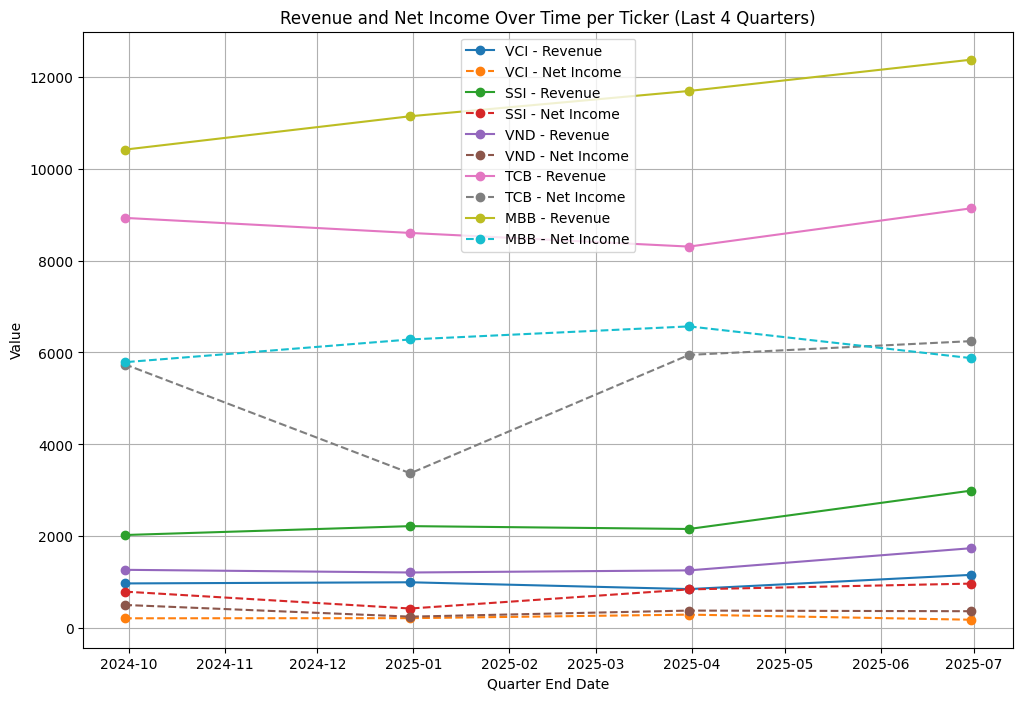

In [173]:
plt.figure(figsize=(12, 8))

# Iterate through each ticker and plot its data
for ticker in summary_table.index.get_level_values('ticker').unique():
    ticker_data = summary_table.loc[ticker]
    plt.plot(ticker_data.index, ticker_data['revenue'], marker='o', linestyle='-', label=f'{ticker} - Revenue')
    plt.plot(ticker_data.index, ticker_data['Net Income'], marker='o', linestyle='--', label=f'{ticker} - Net Income')


plt.title('Revenue and Net Income Over Time per Ticker (Last 4 Quarters)')
plt.xlabel('Quarter End Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Plot time series

### Subtask:
Generate time series plots for the selected ticker showing revenue growth, profit margin, free cash flow, and stock price.


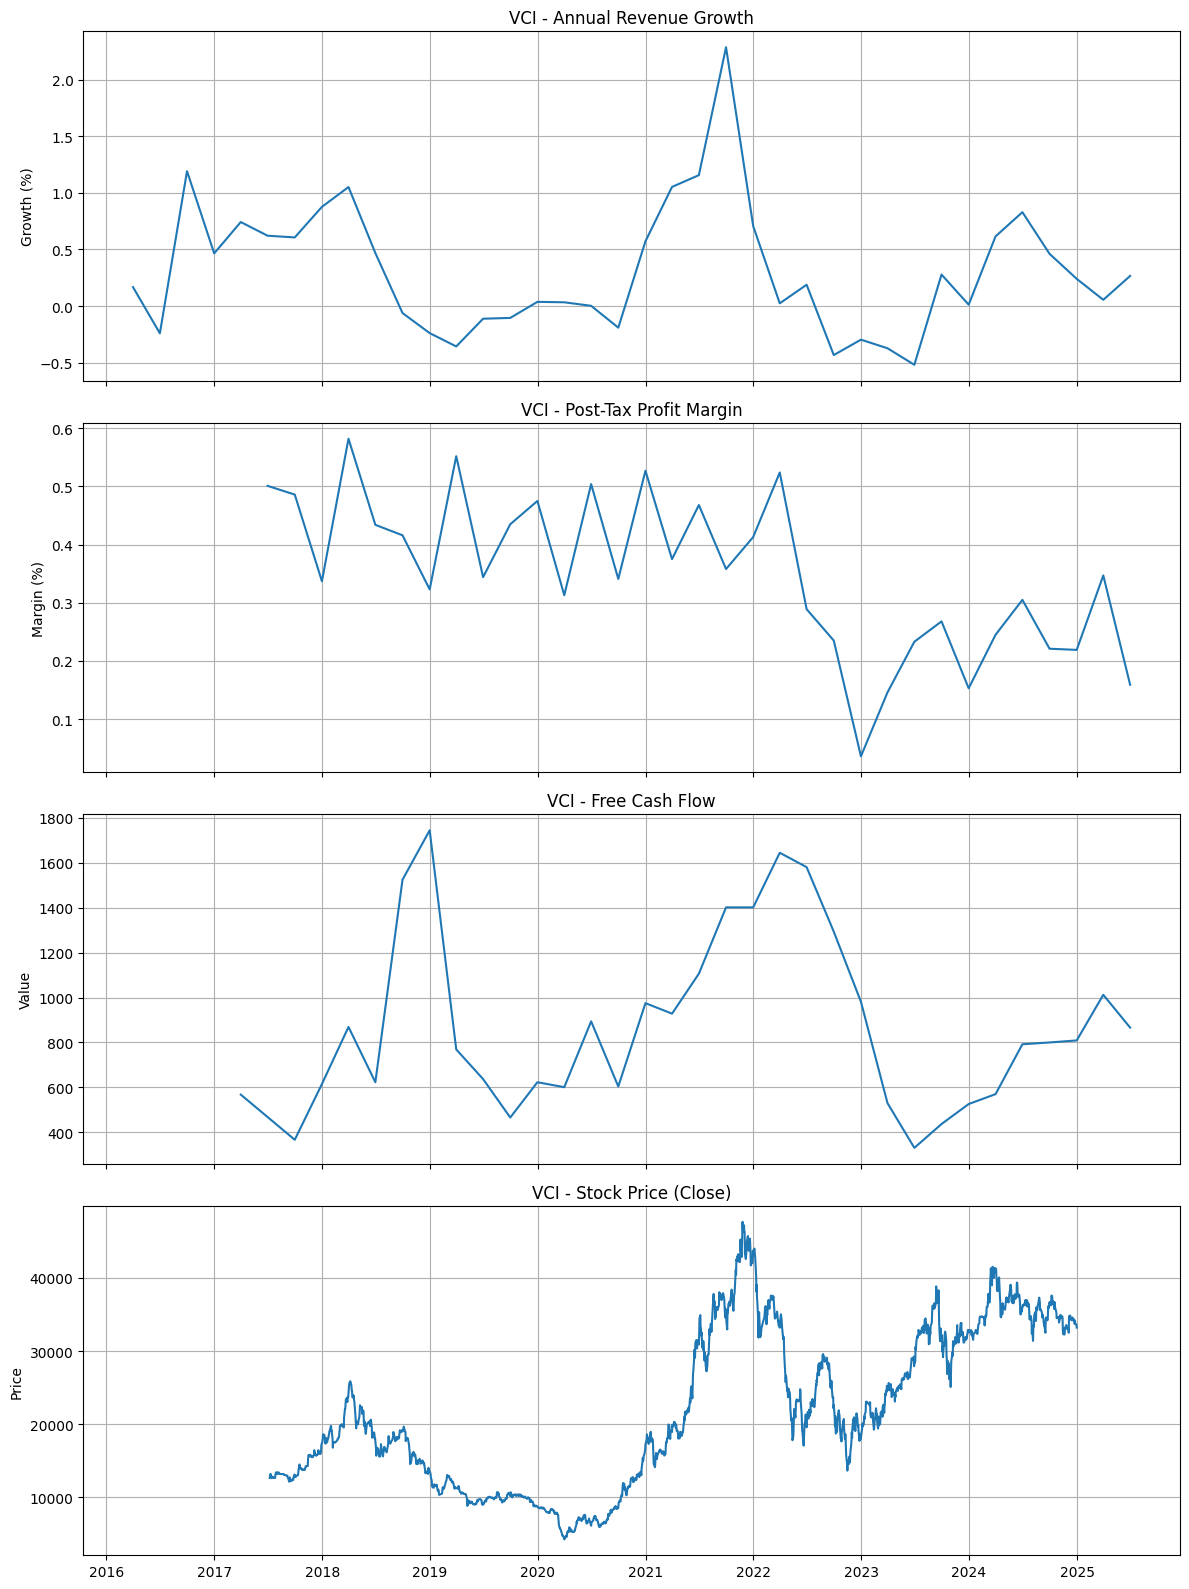

In [146]:
sample_ticker = 'VCI'

# Adjust the sample ticker to match the prices DataFrame index format
sample_ticker_prices = sample_ticker + '.VN'

# Filter data for the sample ticker
is_sample = combined_is.loc[sample_ticker].sort_index()
ratios_sample = combined_ratios.loc[sample_ticker].sort_index()
cf_sample = combined_cf.loc[sample_ticker].sort_index()


# Filter price data for the adjusted sample ticker and ensure datetime index
# The prices dataframe already has a MultiIndex with 'date' as the first level (which is datetime)
# and 'ticker' as the second. Need to select the specific ticker.
prices_sample = prices.loc[(slice(None), sample_ticker_prices), :].copy()
prices_sample.index = prices_sample.index.get_level_values('date') # Extract date level

# Create plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

# Plot Revenue Growth
axes[0].plot(is_sample.index, is_sample['year_revenue_growth'])
axes[0].set_title(f'{sample_ticker} - Annual Revenue Growth')
axes[0].set_ylabel('Growth (%)')
axes[0].grid(True)

# Plot Profit Margin (using post_tax_margin)
axes[1].plot(ratios_sample.index, ratios_sample['post_tax_margin'])
axes[1].set_title(f'{sample_ticker} - Post-Tax Profit Margin')
axes[1].set_ylabel('Margin (%)')
axes[1].grid(True)

# Plot Free Cash Flow
axes[2].plot(cf_sample.index, cf_sample['free_cash_flow'])
axes[2].set_title(f'{sample_ticker} - Free Cash Flow')
axes[2].set_ylabel('Value')
axes[2].grid(True)


# Plot Stock Price (Close)
axes[3].plot(prices_sample.index, prices_sample['close'])
axes[3].set_title(f'{sample_ticker} - Stock Price (Close)')
axes[3].set_ylabel('Price')
axes[3].grid(True)


# Improve layout
plt.tight_layout()
plt.show()

**Reasoning**:
The time series plots have been generated. The next step is to add interpretations for each plot based on visual inspection.



Interpretation for VCI Time Series Plots:
Annual Revenue Growth:
- VCI shows fluctuations in annual revenue growth over time.
- There appears to be a period of strong growth followed by some decline and recent recovery.

Post-Tax Profit Margin:
- The post-tax profit margin for VCI has also varied.
- It shows periods of higher and lower profitability, generally trending downwards in the latter part of the data.

Free Cash Flow:
- Free cash flow for VCI exhibits significant volatility.
- There are periods of both positive and negative free cash flow, indicating variability in cash generation after capital expenditures.

Stock Price (Close):
- VCI's stock price shows a general upward trend over the long term, with notable peaks and troughs.
- The price appears to be influenced by broader market conditions and company-specific performance.

## Calculate and plot correlation heatmap

### Subtask:
Compute the correlation matrix for the fundamental metrics of the selected ticker and visualize it as a heatmap.


,quarter_bs,year_bs,short_asset,cash,short_invest,short_receivable,inventory,long_asset,fixed_asset,asset,...,cash_on_capitalize,revenue_on_work_capital,capex_on_fixed_asset,revenue_on_asset,post_tax_on_pre_tax,ebit_on_revenue,pre_tax_on_ebit,payable_on_equity,ebitda_on_stock_change,book_value_per_share_change
quarter_bs,1.000000,-0.071113,0.016778,0.097729,0.007164,-0.065157,NaN,0.139580,0.026276,0.017443,...,0.112287,-0.048613,0.069694,-0.126546,-0.016929,-0.197590,-0.123670,0.023708,-0.048874,0.244052
year_bs,-0.071113,1.000000,0.927632,0.647396,0.925584,0.580843,NaN,0.279695,0.564870,0.927996,...,0.100160,-0.456890,-0.330426,-0.568100,-0.722521,-0.484127,-0.553739,0.261887,-0.113860,-0.149836
short_asset,0.016778,0.927632,1.000000,0.729676,0.991695,0.631409,NaN,0.220259,0.672297,0.999988,...,0.042468,-0.257745,-0.222455,-0.377902,-0.635307,-0.454573,-0.481253,0.415002,-0.044719,0.026046
cash,0.097729,0.647396,0.729676,1.000000,0.640983,0.373627,NaN,0.172895,0.392371,0.729715,...,0.582692,-0.186693,-0.399152,-0.414592,-0.438454,-0.322336,-0.543648,0.343300,-0.315625,0.008215
short_invest,0.007164,0.925584,0.991695,0.640983,1.000000,0.608915,NaN,0.208618,0.683200,0.991637,...,-0.077436,-0.207960,-0.171047,-0.328073,-0.629775,-0.449944,-0.433028,0.397304,-0.001142,0.037011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebit_on_revenue,-0.197590,-0.484127,-0.454573,-0.322336,-0.449944,-0.287811,NaN,-0.000870,-0.410147,-0.454719,...,-0.077562,0.157036,0.204452,0.340844,0.136211,1.000000,0.630938,-0.120799,0.369019,0.280966
pre_tax_on_ebit,-0.123670,-0.553739,-0.481253,-0.543648,-0.433028,-0.284272,NaN,-0.059393,-0.309952,-0.481703,...,-0.287871,0.337926,0.315023,0.574440,0.226818,0.630938,1.000000,-0.290841,0.436969,0.183499
payable_on_equity,0.023708,0.261887,0.415002,0.343300,0.397304,0.189803,NaN,-0.097898,0.038029,0.414648,...,-0.032872,0.315937,0.086240,0.094536,-0.289597,-0.120799,-0.290841,1.000000,0.051212,0.005425
ebitda_on_stock_change,-0.048874,-0.113860,-0.044719,-0.315625,-0.001142,0.195589,NaN,0.033725,-0.048382,-0.044567,...,-0.331562,-0.022593,-0.000716,0.275824,-0.137470,0.369019,0.436969,0.051212,1.000000,0.293024


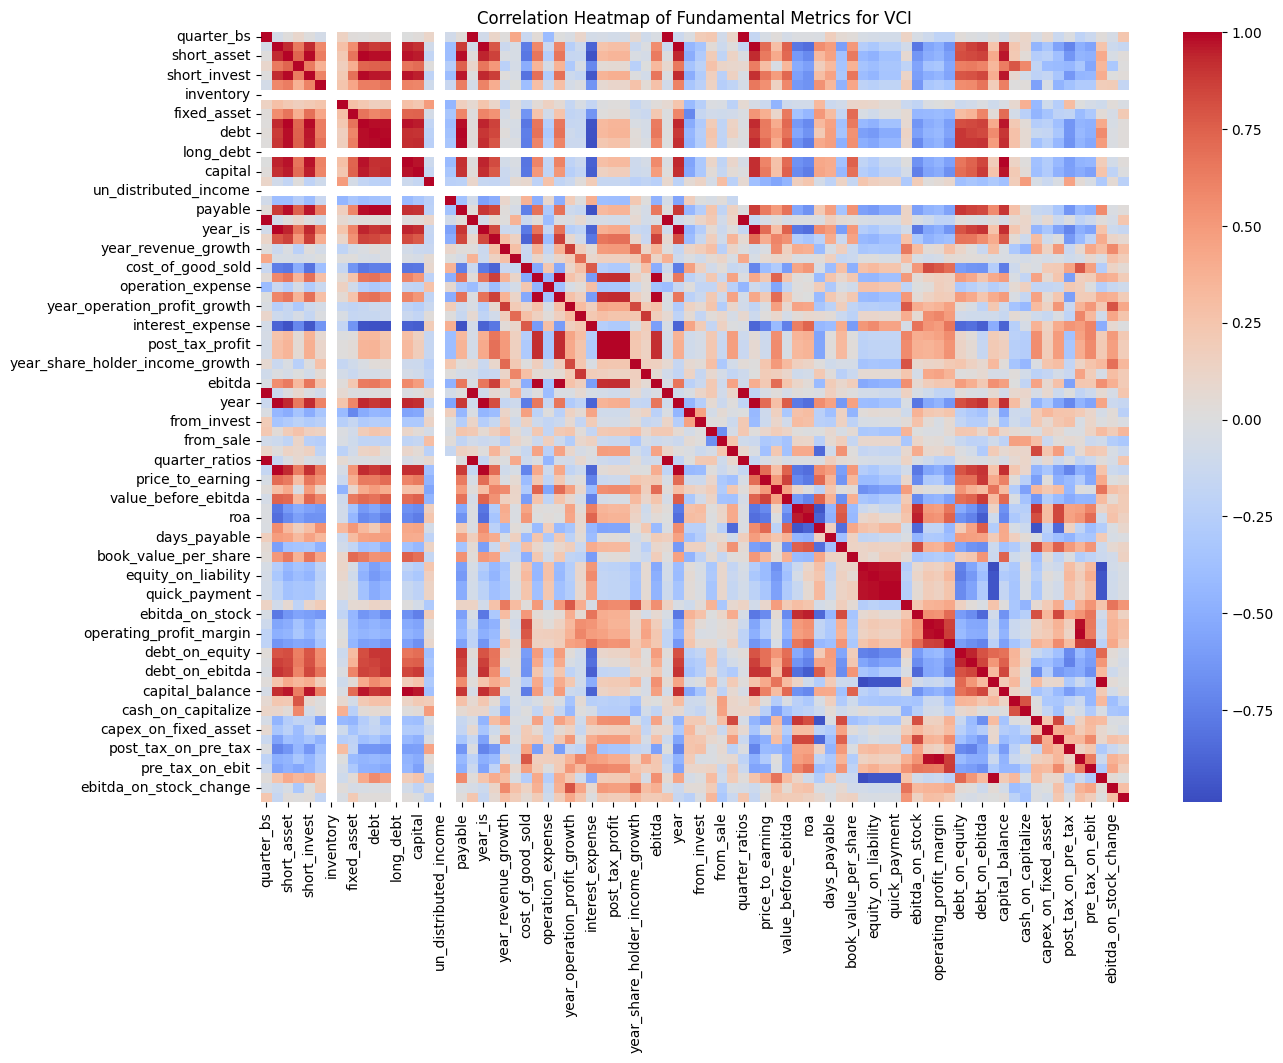

In [168]:
# Filter data for the sample ticker
bs_sample = combined_bs.loc[sample_ticker].sort_index()
is_sample = combined_is.loc[sample_ticker].sort_index()
cf_sample = combined_cf.loc[sample_ticker].sort_index()
ratios_sample = combined_ratios.loc[sample_ticker].sort_index()

# Merge the filtered dataframes
# Use 'outer' join to keep all dates from all dataframes
merged_fundamentals = bs_sample.merge(is_sample, left_index=True, right_index=True, how='outer', suffixes=('_bs', '_is'))
merged_fundamentals = merged_fundamentals.merge(cf_sample, left_index=True, right_index=True, how='outer', suffixes=('', '_cf'))
merged_fundamentals = merged_fundamentals.merge(ratios_sample, left_index=True, right_index=True, how='outer', suffixes=('', '_ratios'))
merged_fundamentals.dropna(axis=1, how='all', inplace=True)

# Calculate the correlation matrix
correlation_matrix = merged_fundamentals.corr()

# Display the correlation matrix
display(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Set annot=True for smaller matrices
plt.title(f'Correlation Heatmap of Fundamental Metrics for {sample_ticker}')
plt.show()

**Reasoning**:
Provide a short interpretation of the correlation heatmap.



Interpretation of the Correlation Heatmap for VCI:
- The heatmap shows the pairwise correlation coefficients between various fundamental metrics for {sample_ticker}.
- Positive correlations (closer to 1) are indicated by warmer colors, while negative correlations (closer to -1) are shown by cooler colors.
- Metrics with high positive or negative correlations might move together significantly.
- Areas with values close to 0 indicate weak or no linear correlation.
- Many metrics show low correlation, possibly due to the limited number of quarterly data points or the nature of the financial metrics themselves.

Interpretation for VCI Time Series Plots:

Annual Revenue Growth:
- VCI shows fluctuations in annual revenue growth over time.
- There appears to be a period of strong growth followed by some decline and recent recovery.

Post-Tax Profit Margin:
- The post-tax profit margin for VCI has also varied.
- It shows periods of higher and lower profitability, generally trending downwards in the latter part of the data.

Free Cash Flow:
- Free cash flow for VCI exhibits significant volatility.
- There are periods of both positive and negative free cash flow, indicating variability in cash generation after capital expenditures.

Stock Price (Close):
- VCI's stock price shows a general upward trend over the long term, with notable peaks and troughs.
- The price appears to be influenced by broader market conditions and company-specific performance.

## Summary:

### Data Analysis Key Findings

*   A summary table for the last four quarters for each of the five tickers (VCI, SSI, VND, TCB, MBB) was successfully generated, including revenue, net income, ROE, ROA, P/E, and P/B.
*   Time series plots for the selected sample ticker (VCI) were successfully generated for Annual Revenue Growth, Post-Tax Profit Margin, Free Cash Flow, and Stock Price (Close).
*   The correlation matrix for various fundamental metrics of VCI was calculated and visualized as a heatmap. Many metrics showed low correlation, possibly due to the limited quarterly data points.
*   Short English interpretations were provided for each of the time series plots and the correlation heatmap, describing the observed trends and patterns.

### Insights or Next Steps

*   Investigate periods of significant volatility in VCI's Free Cash Flow and their correlation with capital expenditures or other balance sheet items.
*   Explore adding more historical data points (if available) to the fundamental analysis to potentially reveal stronger correlations in the heatmap.
